In [1]:
"""import packages"""
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import functools

import tensorflow as tf
from tensorflow import keras

import xlrd
from scipy.io import loadmat
import pandas as pd

In [2]:
"""load data files"""
matFile = loadmat('Pappas_Pulsed_pl200_ge_start800_int1us_1kAvg_multishot_3_mag.mat')
Data = matFile['Data']

vS1File = pd.read_excel('vS1.xlsx', sheet_name='vS1')

In [3]:
"""access columns of VS1 in data set"""
df = pd.DataFrame(vS1File)
vS1_list1 = df.columns.tolist()

"""divide VS1 data into x0 (|g>) and x1 (|e>)"""
x0 = []
x1 = []
for i in range(6700):
    x0.append(np.float(vS1_list1[i]))
for i in list(range(6700,13400)):
    x1.append(np.float(vS1_list1[i]))

In [4]:
"""access cY data and make accessible to plot by pyplot"""
cY_list1 = []
for sublist in Data['cY']:
    for item in sublist:
        cY_list1.append(item)

cY_arr = np.array(cY_list1)
cY_list2 = cY_arr.tolist()
        
cY_list3 = []
for sublist in cY_list2:
    for item in sublist:
        cY_list3.append(item)
        
cY_list4 = []
for sublist in cY_list3:
    for item in sublist:
        cY_list4.append(item)
        
cY_list5 = []
for sublist in cY_list4:
    for item in sublist:
        cY_list5.append(item)
        
cY_list6 = []
for sublist in cY_list5:
    for item in sublist:
        cY_list6.append(np.complex(item))

In [5]:
"""append mag, phase, I, Q data into numpy arrays"""
mag0 = []
mag1 = []
phase0 = []
phase1 = []
I0 = []
I1 = []
Q0 = []
Q1 = []

x0_avg = []
mag0_avg = []
phase0_avg = []
I0_avg = []
Q0_avg = []

x1_avg = []
mag1_avg = []
phase1_avg = []
I1_avg = []
Q1_avg = []

for i in range(6700):
    mag0.append(abs(cY_list6[i]))
    phase0.append(np.angle(cY_list6[i]))
    I0.append(np.real(cY_list6[i]))
    Q0.append(np.imag(cY_list6[i]))
    
for j in list(range(0,6700,100)):
    x0_avg.append(np.mean(x0[j]))
    mag0_avg.append(np.mean(mag0[j]))
    phase0_avg.append(np.mean(phase0[j]))
    I0_avg.append(np.mean(I0[j]))
    Q0_avg.append(np.mean(Q0[j]))
    
for i in list(range(6700,13400)):
    mag1.append(abs(cY_list6[i]))
    phase1.append(np.angle(cY_list6[i]))
    I1.append(np.real(cY_list6[i]))
    Q1.append(np.imag(cY_list6[i]))
    
for j in list(range(0,6700,100)):
    x1_avg.append(np.mean(x1[j]))
    mag1_avg.append(np.mean(mag1[j]))
    phase1_avg.append(np.mean(phase1[j]))
    I1_avg.append(np.mean(I1[j]))
    Q1_avg.append(np.mean(Q1[j]))  

In [12]:
"""consolidate the S_{2,1} of the readout resonator"""
i_readout0 = []
i_readout1 = []

I0_readout = []
I1_readout = []
Q0_readout = []
Q1_readout = []

for i in list(range(0,6700)):
    
    if mag0[i]<=0.0001590 and mag0[i]>=0.0001588:
        i_readout0.append(i)
        
for i in list(range(0,6700)):
    
    if mag1[i]<=0.0007600 and mag1[i]>=0.0007598:
        i_readout1.append(i)
        
for i in list(range(0,1000)):
#for i in list(range(i_readout0[0]-500,i_readout0[0]+500)):
        
    I0_readout.append(np.real(cY_list6[i]))
    Q0_readout.append(np.imag(cY_list6[i]))
        
for i in list(range(6700+i_readout1[0]-500,6700+i_readout1[0]+500)):
    
    I1_readout.append(np.real(cY_list6[i]))
    Q1_readout.append(np.imag(cY_list6[i]))

Text(0, 0.5, 'Angle(S$_{2,1}$)')

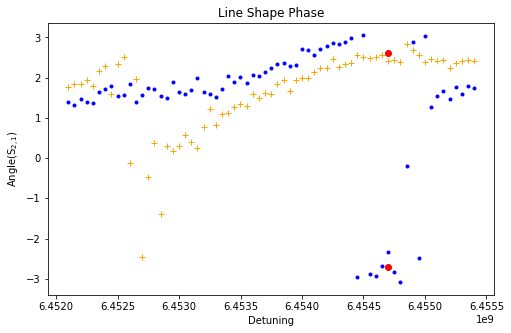

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x0_avg,phase0_avg,'b.')
ax.plot(x1_avg,phase1_avg,'+',color='orange')

ax.plot(x0[i_readout1[0]],phase0[i_readout1[0]],'o',color='red')
ax.plot(x1[i_readout1[0]],phase1[i_readout1[0]],'o',color='red')

plt.title('Line Shape Phase')
plt.xlabel('Detuning')
plt.ylabel('Angle(S$_{2,1}$)')

Text(0, 0.5, '|S$_{2,1}$|')

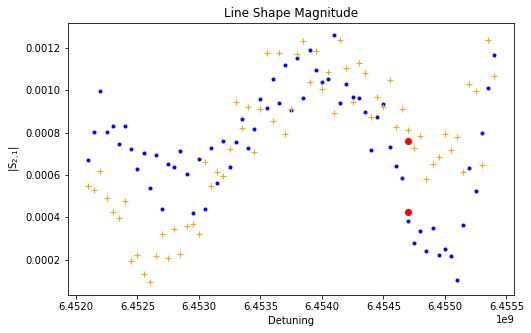

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x0_avg,mag0_avg,'b.')
ax.plot(x1_avg,mag1_avg,'+',color='orange')

ax.plot(x0[i_readout1[0]],mag0[i_readout1[0]],'o',color='red')
ax.plot(x1[i_readout1[0]],mag1[i_readout1[0]],'o',color='red')

plt.title('Line Shape Magnitude')
plt.xlabel('Detuning')
plt.ylabel('|S$_{2,1}$|')

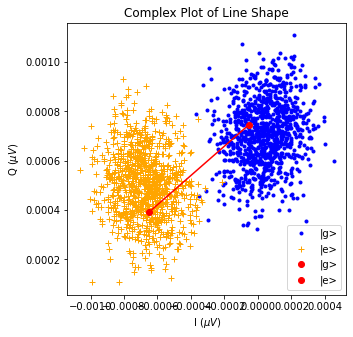

In [41]:
"""plot IQ plot for S_{2,1}"""
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(I0_readout,Q0_readout,'b.',label='|g>')
ax.plot(I1_readout,Q1_readout,'+',color='orange',label='|e>')

ax.plot(I0_readout[500],Q0_readout[500],'ro',label='|g>')
ax.plot(I1_readout[500],Q1_readout[500],'ro',label='|e>')

I_vec = [I1_readout[500],I0_readout[500]]
Q_vec = [Q1_readout[500],Q0_readout[500]]

ax.plot(I_vec,Q_vec,'r')

plt.title('Complex Plot of Line Shape')
plt.xlabel('I ($\mu V$)')
plt.ylabel('Q ($\mu V$)')
plt.legend()

In [53]:
def distance(x_vec,y_vec):
    x = x_vec[1]-x_vec[0]
    y = y_vec[1]-y_vec[0]
    return np.sqrt(x**2+y**2)

print('The distance between the red dots is',distance(I_vec,Q_vec))

The distance between the red dots is 0.0006942785436880214


In [54]:
print(cY_list6[i_readout1[0]])
print(cY_list6[i_readout1[0]+6700])

(-0.0003857977862935513-0.00017930443573277444j)
(-0.0006514397100545466+0.0003911574895028025j)


In [22]:
re_val = []
im_val = []
def argand(complexNumber):
    y = complexNumber
    
    plt.plot(np.real(y), np.imag(y), 'ro')
    re_val.append(np.real(y))
    im_val.append(np.imag(y))
    
    for i in range(0,(len(re_val)-1)):
        x_vec = [re_val[i+1],re_val[i]]
        y_vec = [im_val[i+1],im_val[i]]
        
        plt.plot(x_vec,y_vec,'r')

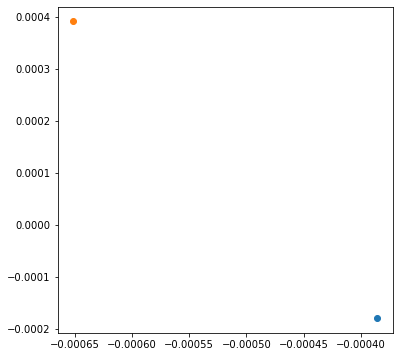

In [30]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(np.real(cY_list6[i_readout1[0]]),np.imag(cY_list6[i_readout1[0]]),'o')
ax.plot(np.real(cY_list6[i_readout1[0]+6700]),np.imag(cY_list6[i_readout1[0]+6700]),'o')